In [6]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


### Préparation du DataSet

Dimensions de l'entrée (X) : (1000, 2)
Dimensions de la sortie (y) : (1000,)


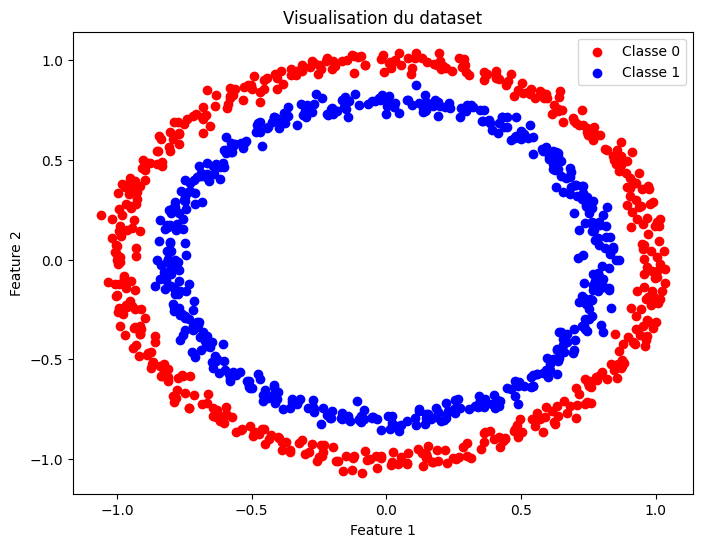

In [7]:
# Création du dataset avec make circles()
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)

# Affichage des dimensions du dataset
print("Dimensions de l'entrée (X) :", X.shape)
print("Dimensions de la sortie (y) :", y.shape)

# Visualisation des données
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Classe 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Classe 1')
plt.title("Visualisation du dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

==> En regardant la visualisation, on peut voir que les classes ne peuvent pas être séparées linéairement. Une fonction non linéaire sera nécessaire pour séparer ces classes.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensions de X_train :", X_train.shape)
print("Dimensions de X_test :", X_test.shape)
print("Dimensions de y_train :", y_train.shape)
print("Dimensions de y_test :", y_test.shape)

Dimensions de X_train : (800, 2)
Dimensions de X_test : (200, 2)
Dimensions de y_train : (800,)
Dimensions de y_test : (200,)


#### Définition du modèle FCNN


Un modèle FCNN (Fully Connected Neural Network) est un réseau de neurones où chaque neurone dans une couche est connecté à tous les neurones de la couche précédente et de la couche suivante. Il est utilisé pour des tâches telles que la classification et la régression, en apprenant des représentations complexes des données grâce à des transformations non linéaires et à l'optimisation des poids du réseau.

In [10]:
model = Sequential()
# Couche entièrement connectée avec 100 neurones cachés
model.add(Dense(100, activation='sigmoid', input_shape=(2,))) 
# Couche de sortie avec activation sigmoid 
model.add(Dense(1, activation='sigmoid'))  

# Affichage du résumé de l'architecture du modèle
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               300       
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Compilation du modèle
model.compile(loss='binary_crossentropy', optimizer=SGD(), metrics=['accuracy'])

# Entrainement du modèle
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6963 - accuracy: 0.4938 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4950 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5100 - val_loss: 0.6931 - val_accuracy: 0.5400
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4913 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4888 - val_loss: 0.6931 - val_accuracy: 0.4700
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.4812 - val_loss: 0.6931 - val_accuracy: 0.5100
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4812 - val_loss: 0.6931 - val_accuracy: 0.5550
Epoch 8/100
2

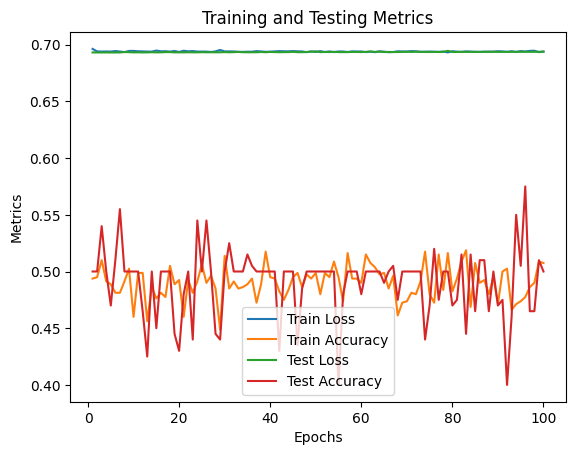

In [13]:
# Affichage de la progression du modèle toutes les 10 époques
epochs = range(1, 101)
plt.plot(epochs, history.history['loss'], label='Train Loss')
plt.plot(epochs, history.history['accuracy'], label='Train Accuracy')
plt.plot(epochs, history.history['val_loss'], label='Test Loss')
plt.plot(epochs, history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Training and Testing Metrics')
plt.legend()
plt.show()